<h1> LDA </h1>


--------

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


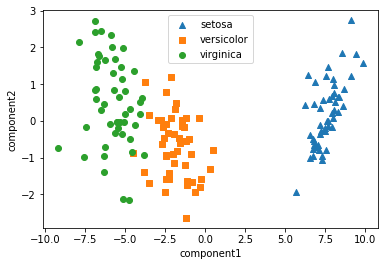

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('component1')
plt.ylabel('component2')
plt.show()

<h1> SVD 분해 </h1>

-------

In [6]:
import numpy as np
from numpy.linalg import svd

# 랜덤 4X4 행렬 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


* 랜덤으로 생성하는 이유 : 독립변수들 간의 상관관계 없애기 위해!

In [8]:
U, Sigma, Vt = svd(a)
print('U\n',np.round(U,3))
print('Sigma\n',np.round(Sigma,3))
print('Vt\n',np.round(Vt,3))

U
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma
 [3.423 2.023 0.463 0.079]
Vt
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [9]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat),Vt)
np.round(a_,3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.014,  0.63 ,  1.71 , -1.327],
       [ 0.402, -0.191,  1.404, -1.969]])

In [10]:
# 선형 종속일 경우 (row간 의존성 존재)

a[2] = a[0] + a[1]
a[3] = a[0]
np.round(a,3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.542,  0.899,  1.041, -0.073],
       [-0.212, -0.285, -0.574, -0.44 ]])

In [11]:
U, Sigma, Vt = svd(a)
print('U\n',np.round(U,3))
print('Sigma\n',np.round(Sigma,3))
print('Vt\n',np.round(Vt,3))

U
 [[ 0.246  0.583 -0.071 -0.771]
 [-0.774 -0.017  0.551 -0.31 ]
 [-0.529  0.566 -0.551  0.31 ]
 [ 0.246  0.583  0.623  0.461]]
Sigma
 [2.663 0.807 0.    0.   ]
Vt
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.703 -0.444  0.056  0.553]
 [-0.129  0.659 -0.606  0.426]]


In [14]:
U_ = U[:, :2]
Sigma_mat = np.diag(Sigma[:2])
Vt_ = Vt[:2]
a_ = np.dot(np.dot(U_,Sigma_mat),Vt_)
np.round(a_,3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.542,  0.899,  1.041, -0.073],
       [-0.212, -0.285, -0.574, -0.44 ]])

<h1> Truncated SVD </h1>

-------

In [18]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(21)
matrix = np.random.random((6,6))
print('원본행렬:\n', matrix)

U, Sigma, Vt = svd(matrix, full_matrices=False)
print('U\n:', U)
print('Sigma\n:', Sigma)
print('Vt\n:', Vt)

num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('U\n:', U_tr)
print('Sigma\n:', Sigma_tr)
print('Vt\n:', Vt_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)

print('복원행렬:\n', matrix_tr)

원본행렬:
 [[0.04872488 0.28910966 0.72096635 0.02161625 0.20592277 0.05077326]
 [0.30227189 0.66391029 0.30811439 0.58359128 0.06957095 0.86740448]
 [0.13324052 0.17812466 0.49592955 0.86369964 0.75894384 0.97048513]
 [0.75930255 0.38425003 0.40871833 0.71336043 0.27066977 0.85410287]
 [0.91316397 0.76075607 0.51666854 0.16783577 0.29869229 0.28394305]
 [0.32721258 0.46014033 0.54436836 0.21740087 0.79986833 0.72668445]]
U
: [[-0.17075128  0.25375057  0.57885222 -0.59523059  0.43476398  0.16752785]
 [-0.41009937 -0.05003605 -0.43168791 -0.66463344 -0.44487224 -0.05754595]
 [-0.49157048 -0.61928932  0.19288635  0.10209817  0.24967068 -0.51465967]
 [-0.48174761  0.01281277 -0.4386615   0.21737782  0.47209045  0.55245692]
 [-0.38200043  0.7410168  -0.04663398  0.24753109  0.00780423 -0.49138833]
 [-0.42780354 -0.01782454  0.49676138  0.29157184 -0.57254103  0.39632962]]
Sigma
: [2.95668773 1.02918132 0.80828638 0.48142609 0.37477594 0.13880505]
Vt
: [[-0.35593288 -0.36587097 -0.37893659 -0.3